# Tensorflow Tutorial

# 1 - Practice

In [56]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# from tensorflow.python.framework import ops
# from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

$$cost = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [57]:
# 定义常量
y_hat = tf.constant(6, name = 'y_hat')
y = tf.constant(2, name = 'y')
# 定义变量
# (6 - 2) ^2 = 16
cost = tf.Variable((y_hat - y) ** 2, name = 'cost')
tf.print(cost)

16


In [58]:
c = tf.multiply(y_hat, y)
print(c) # tf.Tensor(12, shape=(), dtype=int32)
tf.print(c) # 12

tf.Tensor(12, shape=(), dtype=int32)
12


In [59]:
# 定义函数
@tf.function
def f(x):
    return 2 * x

print(f(3))

tf.Tensor(6, shape=(), dtype=int32)


## 1.1 - Linear Regression

In [60]:
def linear_regression ():
    np.random.seed(1)
    # Y = np.dot(W.T, X) + b
    X = np.random.randn(3, 1)
    W = np.random.randn(3, 4)
    b = np.random.randn(4, 1)
    Y = tf.add(tf.matmul(W.T, X), b)
    return Y
    
Y_pred = linear_regression()

## 1.2 - Sigmoid function

In [61]:
def sigmoid (Z):
    # 1 / (np.exp(-Z) + 1)
    return tf.sigmoid(Z)

sigmoid(np.random.randn(3, 1))

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.64171493],
       [0.2496239 ],
       [0.75854586]])>

# 1.3 - Cost function

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$


In [62]:
"""
def cost_function (A, Y):
    m = Y.shape[1]
    cost = - Y * np.log(A + 1e-7) - (1 - Y) * np.log(1 - A + 1e-7)
    return np.sum(cost) / m
"""
def cost_function (A, Y):
    return tf.nn.sigmoid_cross_entropy_with_logits(A, Y)

Y = tf.constant(np.random.randn(4, 1), name = 'y')
cost_function(Y_pred, Y)

<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[2.40441885],
       [0.3684111 ],
       [5.08026603],
       [1.35428678]])>

# 1.4 - Initialize with zeros and ones
- shape = [2, 3]
- tf.ones(shape)
- tf.zeros(shape)

In [63]:
def initialize_zeros_ones (shape):
    ones = tf.ones(shape)
    zeros = tf.zeros(shape)
    return ones, zeros

initialize_zeros_ones([2, 3])

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>)

## 1.5 - One Hot encodings (softmax)

![image](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning,%20Regularization%20and%20Optimization/images/onehot.png)

例如列表有[1, 2, 0] 三个数字, 形成矩阵为
- 1: [0, 1, 0].T
- 2: [0, 0, 1].T
- 0: [1, 0, 0].T


```python
# one-hot方式, 有C列, 每列填1的值, 是[....] 数组决定
np.eye(C)[.....]
```

```python
# TF
tf.one_hot(indices = Y, depth = C, axis = 0)
```

In [64]:
"""
reshape(m, n) 
根据现在的矩阵, 重新将矩阵变成 m列n行
-1 懒得计算填写, python自己推算吧
"""
testOnes = np.ones(shape = (3, 2))
print('testOnes: ', testOnes)
print('reshape(-1): ', testOnes.reshape(-1))
print('reshape(-1, 1): ', testOnes.reshape(-1, 1))
print('reshape(-1, 3): ', testOnes.reshape(-1, 3))

testOnes:  [[1. 1.]
 [1. 1.]
 [1. 1.]]
reshape(-1):  [1. 1. 1. 1. 1. 1.]
reshape(-1, 1):  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
reshape(-1, 3):  [[1. 1. 1.]
 [1. 1. 1.]]


In [65]:
def convert_to_one_hot (Y, C):
    return np.eye(C)[Y.reshape(-1)].T

def convert_to_one_hot_TF(Y, C):
    one_hot_matrix = tf.one_hot(indices = Y, depth = C, axis = 0)
    return one_hot_matrix

In [66]:
Y = np.array([1, 2, 0, 1, 3])
C = 4

print(convert_to_one_hot(Y, C))

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [67]:
print(convert_to_one_hot_TF(Y, C))

tf.Tensor(
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]], shape=(4, 5), dtype=float32)


# 2 - Building NN in TF

## 2.1 - Load Data

In [68]:
def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
 
    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [69]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [70]:
def handle_data (X_train_orig, Y_train_orig, X_test_orig, Y_test_orig):
    # X flatten
    X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
    X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

    X_train_flatten = X_train_flatten / 255.
    X_test_flatten = X_test_flatten / 255.
    
    # Y softmax
    # [1, 2, 0] => softmax 变换
    Y_train = convert_to_one_hot(Y_train_orig, 6)
    Y_test = convert_to_one_hot(Y_test_orig, 6)
    
    return X_train_flatten, X_test_flatten, Y_train, Y_test

X_train_flatten, X_test_flatten, Y_train, Y_test = handle_data (X_train_orig, Y_train_orig, X_test_orig, Y_test_orig)

print(X_train_flatten.shape) # (12288, 1080)
print(Y_train.shape) # (6, 1080)


(12288, 1080)
(6, 1080)


Y:  2
Y_train[:. index]:  [0. 0. 1. 0. 0. 0.]


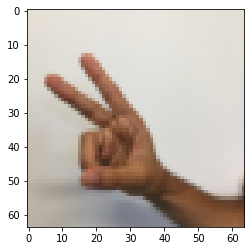

In [71]:
index = 6
plt.imshow(X_train_orig[index])
print('Y: ', np.squeeze(Y_train_orig[:, index]))
print('Y_train[:. index]: ', Y_train[:, index])

## 2.2 - Initializing parameters

In [72]:
features = X_train_flatten.shape[0]
# softmax 输出6个数字
Layers = np.array([features, 25, 12, 6])

In [73]:
def init_parameters (Layers):
    np.random.seed(1)
    
    l_input = Layers[0]
    l_hidden_1 = Layers[1]
    l_hidden_2 = Layers[2]
    l_output = Layers[3]

    # 以TF方式 输出这些parameters
    W1 = tf.Variable(np.random.randn(l_input, l_hidden_1))
    b1 = tf.Variable(np.zeros(shape = (l_hidden_1, 1)))
    
    W2 = tf.Variable(np.random.randn(l_hidden_1, l_hidden_2))
    b2 = tf.Variable(np.zeros(shape = (l_hidden_2, 1)))
    
    W3 = tf.Variable(np.random.randn(l_hidden_2, l_output))
    b3 = tf.Variable(np.zeros(shape = (l_output, 1)))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    return parameters


In [74]:
parameters = init_parameters (Layers)

## 2.3 - Forward Propagation

- tf.transpose(W)
- tf.nn.relu(Z)

- tf.matmul(W.T, X)
- tf.add(XX, b)


In [75]:
def forward_propagation (X, parameters):
    p = parameters
    W1 = p['W1']
    b1 = p['b1']
    
    W2 = p['W2']
    b2 = p['b2']
    
    W3 = p['W3']
    b3 = p['b3']
    
    # np.dot(W.T, X) + b
    Z1 = np.dot(tf.transpose(W1), X) + b1
    A1 = tf.nn.relu(Z1)
    
    Z2 = np.dot(tf.transpose(W2), A1) + b2
    A2 = tf.nn.relu(Z2)
    
    # tf.add(tf.matmul(tf.transpose(W3), A2), b3)
    Z3 = np.dot(tf.transpose(W3), A2) + b3

    return Z3

In [76]:
Z3 = forward_propagation(X_train_flatten, parameters)
print(Z3)

tf.Tensor(
[[-321.63048498 -408.61544615 -431.74897472 ... -437.81962796
  -336.68337789 -396.6043488 ]
 [ 292.15201455  382.96857748  158.35656135 ...  378.89846808
   145.15841231  169.23050794]
 [ -23.36163251 -171.14646118  -16.08087056 ... -136.25647004
   -76.70290991 -148.35155579]
 [ 360.64011526  522.45586139  443.66849071 ...  490.68539838
   304.41858068  498.33545174]
 [-161.09857581   90.26277934  -76.06305442 ... -130.01766264
   -32.36013901   17.53737039]
 [ 587.99965695  653.84162298  944.88428597 ...  854.73892442
   713.22366361  800.53031744]], shape=(6, 1080), dtype=float64)


## 2.4 - Cost Function

- tf.nn.sigmoid_cross_entropy_with_logits(A, Y)
- tf.reduce_mean(A, axis = 0) 按列求平均值
- tf.reduce_mean(A, axis = 1) 按行求平均值
- tf.reduce_mean(A) 整体求平均值

In [77]:
def compute_costfunction (A, Y):
    """
    def cost_function (A, Y):
        m = Y.shape[1]
        cost = - Y * np.log(A + 1e-7) - (1 - Y) * np.log(1 - A + 1e-7)
        return np.sum(cost) / m
    """
    # A: (6, 1080) Y: (6, 1080)
    # J: (6, 1080), 一行还有6个label值, 有1080个样本值
    J_mat = tf.nn.sigmoid_cross_entropy_with_logits(A, Y)
    
    J = tf.reduce_mean(J_mat)
    print('J: ', J)
    return J

compute_costfunction (Z3, Y_train)

J:  tf.Tensor(-25.720672501205456, shape=(), dtype=float64)


<tf.Tensor: shape=(), dtype=float64, numpy=-25.720672501205456>

## 2.5 - Backward Propagation & Update Parameters

- tf.optimizers.Adam()(learning_rate=learning_rate).minimize(cost)

# 3 - Build Model with TF

In [78]:
x = tf.Variable(initial_value = 3.)
# 计算步骤求导
with tf.GradientTape() as tape:
    # y = x ^ 2 => y' = 2x
    y = tf.square(x)
# 计算y关于x的导数
grad = tape.gradient(y, x)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


In [79]:
def training (X, Y, alpha = 0.0001, iterations = 1500, minibatch = 64):
    tf.random.set_seed(1)
    (features, m) = X.shape # (12288 1080)
    Layers = np.array([features, 25, 12, 6])
    # 1. initialize parameters
    parameters = init_parameters (Layers)
    
    # 2. forward propagation
    # softmax, 最后输出的是Z
    # Z = forward_propagation(X, parameters)

    
    # 3. backward propagation
    # 3-1. create an optimizer
    # opt = tf.optimizers.SGD(learning_rate=0.1)
    # Compute the gradients for a list of variables.
    with tf.GradientTape() as tape:
        # 3-2 cost function
        Z = forward_propagation(X, parameters)
        J = compute_costfunction(Z, Y)
#     p = parameters
#     W1 = p['W1']
#     b1 = p['b1']

#     W2 = p['W2']
#     b2 = p['b2']

#     W3 = p['W3']
#     b3 = p['b3']
    
#     vars = [W1, b1, W2, b2, W3, b3]
#     grads = tape.gradient(J, vars)
#     processed_grads = [process_gradient(g) for g in grads]
    print(J)
    # ======= TODO ======= 
    

In [80]:
training(X_train_flatten, Y_train)

J:  tf.Tensor(-25.720672501205456, shape=(), dtype=float64)
tf.Tensor(-25.720672501205456, shape=(), dtype=float64)


# 4. TF 2.0

In [137]:
# 1. Build Model
# (1080, 64, 64, 3)
m, n_H, n_W, n_C = X_train_orig.shape

model = keras.Sequential([
    keras.layers.Flatten(input_shape = [n_H, n_W, n_C]), # (64 * 64 * 3)
    keras.layers.Dense(500, activation = 'relu'), # 100
    keras.layers.Dense(50, activation = 'relu'), # 50
    keras.layers.Dense(6) # 6
])

In [138]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [139]:

# y: 这里必须是 一行为一组数据 
# (1, 1080)
model.fit(X_train_orig / 255.0, Y_train_orig.T, epochs=50)

Train on 1080 samples
Epoch 1/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 5.0396 - accuracy: 0.2102
Epoch 2/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.8231 - accuracy: 0.2898
Epoch 3/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.8071 - accuracy: 0.3750
Epoch 4/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.7029 - accuracy: 0.3907
Epoch 5/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.2771 - accuracy: 0.5148
Epoch 6/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.2534 - accuracy: 0.5343
Epoch 7/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.5253 - accuracy: 0.4472
Epoch 8/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.4075 - accuracy: 0.4824
Epoch 9/50
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.2077 - accuracy: 0.5306
Epoch 10/50
1080/1080 [===================

In [140]:
# test_loss, test_acc = model.evaluate(X_test_orig / 255.0, Y_test_orig.T, verbose=2)

In [141]:
model_predictions = keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

y_predict = model_predictions.predict(X_test_orig / 255.0)

print(y_predict[4])

[2.1527281e-05 8.4887153e-01 1.5081036e-01 1.0816630e-05 1.9523046e-04
 9.0461646e-05]


In [160]:
def plot_img (index):
    plt.imshow(X_test_orig[index])
    print('label值:', Y_test_orig.T[index])
    print('预测列表:', y_predict[index])
    print('预测index, 预测概率', np.argmax(y_predict[index]), str(int(np.max(y_predict[index]) * 100)) + '%')
    

label值: [3]
预测列表: [9.7528199e-04 3.1118005e-04 3.3888305e-03 4.8527020e-01 3.5051826e-01
 1.5953618e-01]
预测index, 预测概率 3 48%


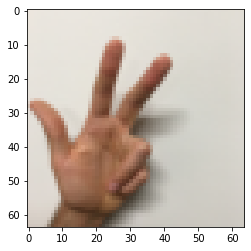

In [163]:
plot_img(15)